### 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('data//iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

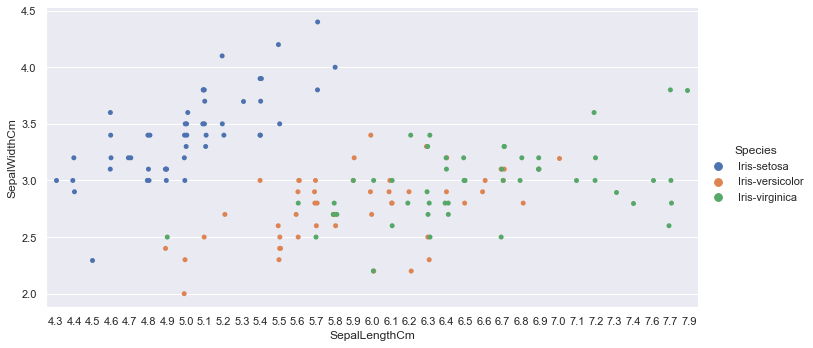

In [5]:
sns.catplot(data=df, x='SepalLengthCm', y='SepalWidthCm',hue='Species',aspect=2)

### Feature Engineering

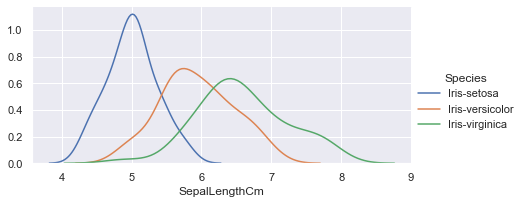

In [6]:
# kdeplot으로 꽃받침 길이별 밀집 수준 파악
facet = sns.FacetGrid(df, hue='Species', aspect=2)
facet.map(sns.kdeplot, 'SepalLengthCm')
facet.add_legend()

plt.show()

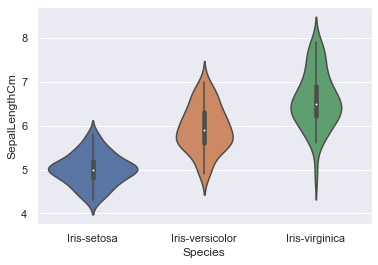

In [7]:
sns.violinplot(data=df,x='Species',y='SepalLengthCm')

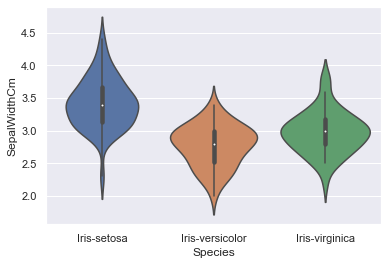

In [8]:
sns.violinplot(data=df,x='Species',y='SepalWidthCm')

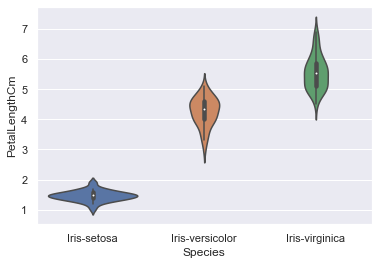

In [9]:
sns.violinplot(data=df,x='Species',y='PetalLengthCm')

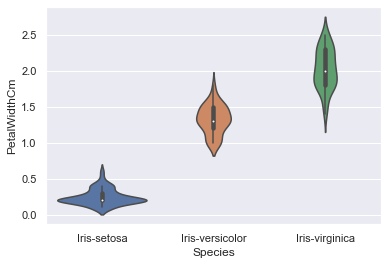

In [10]:
sns.violinplot(data=df,x='Species',y='PetalWidthCm')

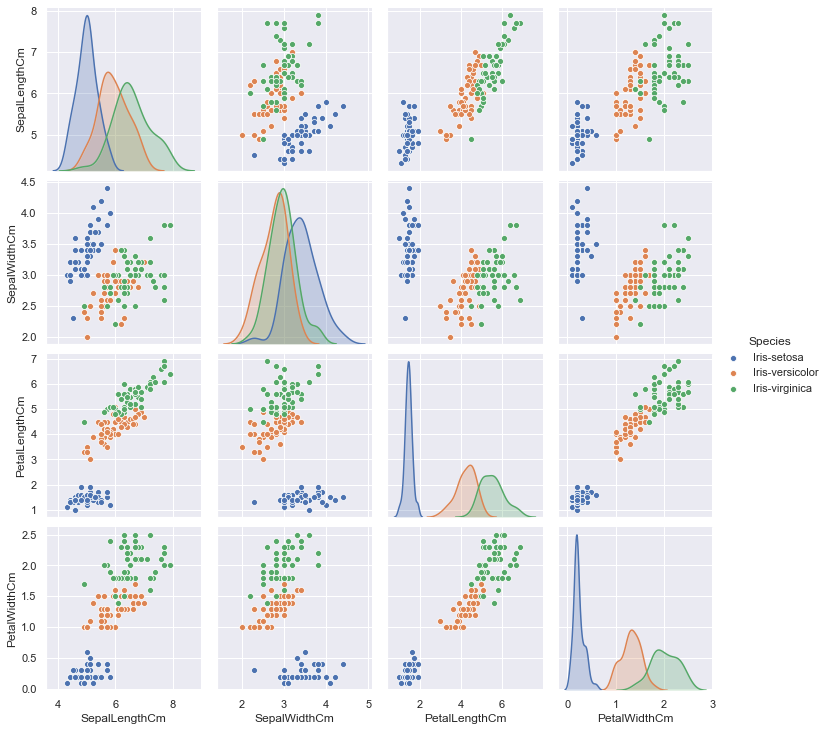

In [11]:
sns.pairplot(data = df, hue='Species',
        x_vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
        y_vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

### Scikit-learn으로 Random Forest 구현

In [16]:
# Training set과 Validation Set 나누기
from sklearn.model_selection import train_test_split

train_data = df.drop('Species', axis=1)
target_data = df['Species']

x_train, x_test, y_train, y_test = train_test_split(train_data, target_data)
print(train_data.shape, x_train.shape, x_test.shape)

(150, 5) (112, 5) (38, 5)


### Decision Tree 학습 및 평가

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

print("training set accuracy: ",tree.score(x_train, y_train))
print("test set accuracy: ",tree.score(x_test,y_test))


training set accuracy:  1.0
test set accuracy:  1.0


In [19]:
prediction = tree.predict(x_test)
prediction

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

### Random Forest 학습 및 평가

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_train, y_train)

print("training set accuracy: ",forest.score(x_train, y_train))
print("test set accuracy: ",forest.score(x_test,y_test))

prediction = forest.predict(x_test)
prediction

training set accuracy:  1.0
test set accuracy:  0.9736842105263158


array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

### 결과 csv파일 만들기

In [22]:
result = pd.DataFrame({
    'Species':prediction
})
result.to_csv('result.csv',index=False)

In [23]:
res = pd.read_csv('result.csv')
res.head(10)

,Species
0,Iris-virginica
1,Iris-setosa
2,Iris-versicolor
3,Iris-versicolor
4,Iris-versicolor
5,Iris-virginica
6,Iris-versicolor
7,Iris-virginica
8,Iris-virginica
9,Iris-versicolor
